In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [ ]:
df_train_x = pd.read_csv("/content/drive/MyDrive/포스코/조별과제1/df_train_x_notnull.csv")
df_train_y = pd.read_csv("/content/drive/MyDrive/포스코/조별과제1/df_train_y_notnull.csv")
df_test_x = pd.read_csv("/content/drive/MyDrive/포스코/조별과제1/df_test_x_notnull.csv")
df_test_y = pd.read_csv("/content/drive/MyDrive/포스코/조별과제1/df_test_y_notnull.csv")

df_train_x.shape

(4813, 24)

In [ ]:
df_train = pd.concat([df_train_y, df_train_x], axis=1)
df_train.shape

(4813, 25)

In [ ]:
df_test = pd.concat([df_test_y, df_test_x], axis=1)

In [ ]:
# First Regression
formula1 = 'Price ~ ' + ' + '.join(df_train.drop(columns=['Price']).columns)

model1 = smf.ols(formula=formula1, data=df_train)
results1 = model1.fit()

print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     573.2
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        08:21:17   Log-Likelihood:                -50930.
No. Observations:                4813   AIC:                         1.019e+05
Df Residuals:                    4793   BIC:                         1.020e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.15

In [ ]:
# Data Scaling
df_num_train = df_train_x[['Year', 'Kilometers_Driven', 'Mileage', 'Power', 'Seats']]
df_char_train = df_train_x.drop(columns=['Year', 'Kilometers_Driven', 'Mileage', 'Power', 'Seats'], axis=1)

scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_num_train)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_num_train.columns)

# 문자 데이터 + 숫자 데이터
df_scaled = pd.concat([df_numeric_scaled, df_char_train, df_train_y],axis = 1)
df_scaled.head()

,Year,Kilometers_Driven,Mileage,Power,Seats,Engine,Name_Asia,Name_Europe,Name_India,Name_Korea,...,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Above,Owner_Type_Second,Owner_Type_Third,Price
0,0.461457,0.119170,1.629147,-0.731977,-0.352986,1248,0,0,1,0,...,1,0,0,0,1,1,0,0,0,7281.56
1,-1.121349,1.654166,0.057001,-0.632229,-0.352986,1199,0,0,0,0,...,0,0,1,0,1,0,0,1,0,3065.92
2,-0.488227,0.266755,1.686316,-1.034916,-0.352986,936,0,0,0,0,...,1,0,0,0,1,1,0,0,0,3679.10
3,0.461457,-0.335016,-1.681888,2.607737,2.123577,2987,0,1,0,0,...,1,0,0,1,0,1,0,0,0,85845.76
4,-0.488227,1.319853,-1.634247,1.059794,2.123577,2982,1,0,0,0,...,1,0,0,0,1,0,0,0,1,24527.36


In [ ]:
#  Regression
lr_formula = 'Price ~ ' + ' + '.join(df_scaled.drop(columns=['Price', 'Owner_Type_First', 'Owner_Type_Above',
                                                          'Owner_Type_Second', 'Owner_Type_Third', 'Engine',
                                                          'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Mileage']).columns)

lr_model = smf.ols(formula=lr_formula, data=df_train)
lr_results = lr_model.fit()

print(lr_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     951.6
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        08:22:53   Log-Likelihood:                -50999.
No. Observations:                4813   AIC:                         1.020e+05
Df Residuals:                    4801   BIC:                         1.021e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.50

In [ ]:
# 회귀분석
import statsmodels.formula.api as smf
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
# Random Forest
from sklearn.ensemble import RandomForestRegressor
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
# 평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
models = ['Linear', 'Decision Tree', 'Random Forest', 'GBM', 'XGBoost']

mse, rmse, mae, mape = [], [], [], []

In [ ]:
# Linear Regression
lr_formula = 'Price ~ ' + ' + '.join(df_train.drop(columns=['Price']).columns)
lr_model = smf.ols(formula=lr_formula, data=df_train)
lr_result = lr_model.fit()

# Decision Tree
dt_model = DecisionTreeRegressor(min_samples_leaf = 8, min_samples_split = 20, max_depth = 4 )
dt_model.fit(df_train_x, df_train_y)

# Random Forest
rf_model = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 3,
                                 min_samples_split = 8, max_depth = 8)
rf_model.fit(df_train_x, df_train_y)

# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators = 100, min_samples_leaf = 3,
                                     min_samples_split = 6, max_depth = 6, learning_rate = 0.14)
gb_model.fit(df_train_x, df_train_y)

# XGBoost
xgb_model = XGBRegressor(max_depth=6, n_estimators=100, learning_rate=0.18)
xgb_model.fit(df_train_x, df_train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.18, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
lr_y_pred = lr_result.predict(df_test)

# 평가
mse.append(mean_squared_error(df_test['Price'], lr_y_pred))
rmse.append(mean_squared_error(df_test['Price'], lr_y_pred, squared=False))
mae.append(mean_absolute_error(df_test['Price'], lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test['Price'], lr_y_pred))

# 의사결정나무예측
dt_y_pred = dt_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test['Price'], dt_y_pred))
rmse.append(mean_squared_error(df_test['Price'], dt_y_pred, squared=False))
mae.append(mean_absolute_error(df_test['Price'], dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test['Price'], dt_y_pred))

# 랜덤포레스트예측
rf_y_pred = rf_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test['Price'], rf_y_pred))
rmse.append(mean_squared_error(df_test['Price'], rf_y_pred, squared=False))
mae.append(mean_absolute_error(df_test['Price'], rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test['Price'], rf_y_pred))

# 그래디언트부스팀예측
gb_y_pred = gb_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test['Price'], gb_y_pred))
rmse.append(mean_squared_error(df_test['Price'], gb_y_pred, squared=False))
mae.append(mean_absolute_error(df_test['Price'], gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test['Price'], gb_y_pred))

# XGBoost
xgb_y_pred = xgb_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test['Price'], xgb_y_pred))
rmse.append(mean_squared_error(df_test['Price'], xgb_y_pred, squared=False))
mae.append(mean_absolute_error(df_test['Price'], xgb_y_pred))
mape.append(mean_absolute_percentage_error(df_test['Price'], xgb_y_pred))

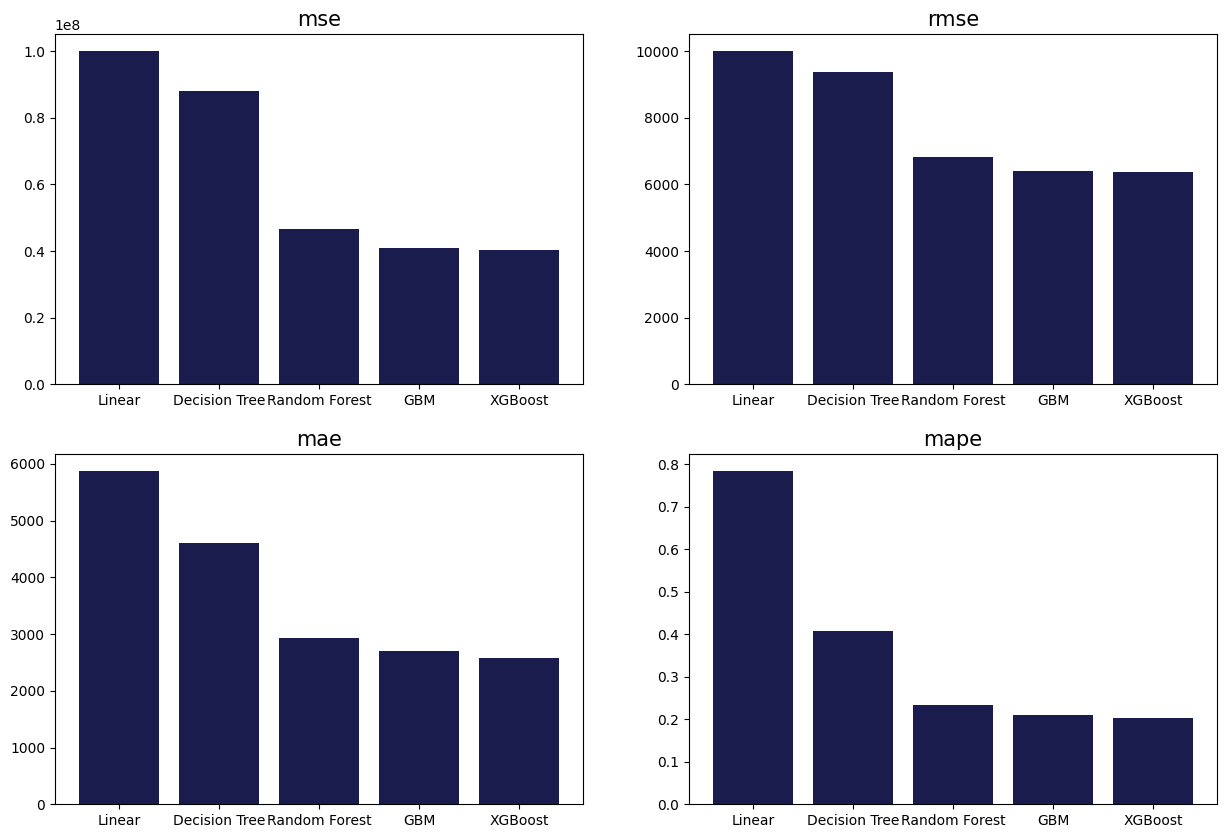

In [ ]:
# 192 Page
fig, ax = plt.subplots(2, 2, figsize = (15,10))
color = '#191c4cff'  # Desired color

ax[0, 0].bar(models, mse, color=color)
ax[0, 0].set_title("mse").set_fontsize(15)

ax[0, 1].bar(models, rmse, color=color)
ax[0, 1].set_title("rmse").set_fontsize(15)

ax[1, 0].bar(models, mae, color=color)
ax[1, 0].set_title("mae").set_fontsize(15)

ax[1, 1].bar(models, mape, color=color)
ax[1, 1].set_title("mape").set_fontsize(15)

plt.show()